<a href="https://colab.research.google.com/github/endyjams/TextDetection/blob/main/text_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image

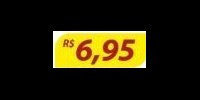

O texto detectado na imagem RGB foi:  


In [ ]:
# Leitura da imagem
img = cv2.imread('/content/img0001.png')

# Imagem no formato RGB
cv2_imshow(img)

# Tentativa de detecção do texto na imagem RGB:
print("O texto detectado na imagem RGB foi: ", pytesseract.image_to_string(img))

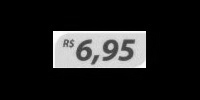

O texto detectado na imagem em tons de cinza foi:  "6,95



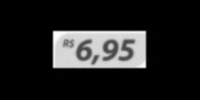

O texto detectado na imagem borrada foi:  6,95



In [ ]:
# Conversão da imagem de RGB para cinza
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Imagem em tons de cinza:
cv2_imshow(grey_img)

# Tentativa de detecção do texto na imagem em tons de cinza:
print("O texto detectado na imagem em tons de cinza foi: ", pytesseract.image_to_string(grey_img))

# Aplicação do filtro gaussiano (borrando a imagem) para redução de ruídos
# Se não houver a aplicação do filtro, pode ser que haja a adição de conteúdos que não estavam na imagem original
blurring_img = cv2.GaussianBlur(grey_img, (3,3), 0)

# Imagem borrada com aplicação do filtro gaussiano:
cv2_imshow(blurring_img)

# Tentativa de detecção do texto na imagem borrada:
print("O texto detectado na imagem borrada foi: ", pytesseract.image_to_string(blurring_img))

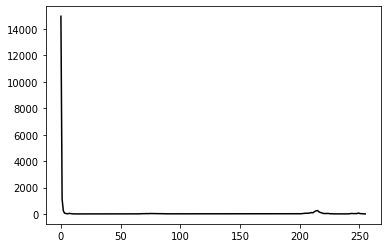

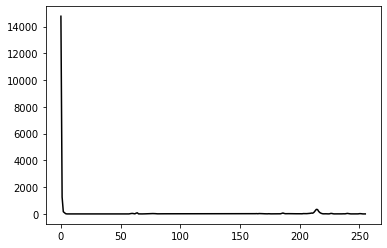

In [ ]:
# Histograma da imagem em níveis de cinza (distribuição de frequência em níveis de cinza):
grey_img_histogram = np.histogram(grey_img.ravel(), bins = 256, range = (0,255))
plt.plot(grey_img_histogram[0], '-k')
plt.show()

# Histograma da imagem borrada (Filtro Gaussiano)
blurring_img_histogram = np.histogram(blurring_img.ravel(), bins = 256, range = (0,255))
plt.plot(blurring_img_histogram[0], '-k')
plt.show()

In [ ]:
# Agora, basicamente o que será feito é:
# Tornar a parte da imagem que contém o texto mais nítida e isolada
# Isso fará com que a função do pytesseract detecte o texto com uma precisão cada vez maior

# Aplicação do thresholding
# parâmetros(img, threshold.min, threshold.max, threshold.type)
binary_img = cv2.threshold(blurring_img, 155, 255, cv2.THRESH_BINARY_INV)[1]

# Esta técnica é usada para contrastar o objeto alvo em relação ao ambiente que ele está inserido
# Conversão da imagem em binária (seus níveis de cor irão varia entre preto e branco)

Histograma da imagem binária:


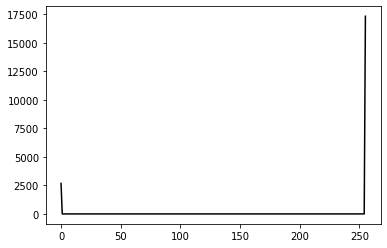

Histograma do inverso da imagem binária:


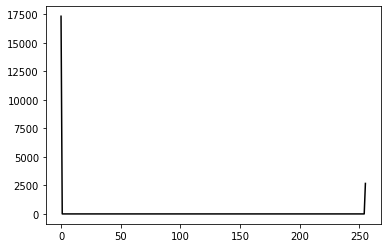

In [ ]:
# Perceba que até agora não foi possível detectar texto como um todo
# Isso ocorreu, pois a função do pytesseract ainda não consegue reconhecer
# Devido a falta de constraste entre o objeto alvo e o ambiente
# A função ainda não consegue reconhecer o contorno principal a ser detectado

# Inverso da imagem binária
inverted_img = 255 - binary_img


print("Histograma da imagem binária:")
binary_img_histogram = np.histogram(binary_img.ravel(), bins = 256, range = (0,255))
plt.plot(binary_img_histogram[0], '-k')
plt.show()
print("Histograma do inverso da imagem binária:")
inverted_img_histogram = np.histogram(inverted_img.ravel(), bins = 256, range = (0,255))
plt.plot(inverted_img_histogram[0], '-k')
plt.show()

Imagem Binária:


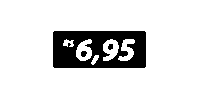

O texto detectado na imagem binária foi: 


In [ ]:
# Houve a obtenção de uma boa imagem, no entanto, ainda não é o suficiente para a detecção do texto
# O que deve ser feito em seguida é:
# Fazer o crop da imagem(recorte), para que seja ignorada a parte que não contém o texto
# Veja a seguir os resultados tanto da imagem, quanto do seu inverso
# Inverso da imagem (Mapeamento dos níveis atuais de preto e branco para seus opostos)

# Imagem binária:
print("Imagem Binária:")
cv2_imshow(binary_img)
# Tentativa de detecção do texto na imagem binária:
print("O texto detectado na imagem binária foi:", pytesseract.image_to_string(binary_img))

Inverso da imagem binária:


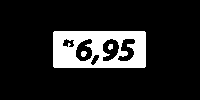

O texto detectado no inverso da imagem binária foi: 


In [ ]:
#Inverso da Imagem binária:
print("Inverso da imagem binária:")
cv2_imshow(inverted_img)
# Tentativa de detecção do texto no inverso imagem binária:
print("O texto detectado no inverso da imagem binária foi:", pytesseract.image_to_string(inverted_img))

In [ ]:
# Realizando o crop em todas as fases da imagem
inverted_img = inverted_img[17:80, 50:153]
blurring_img = blurring_img[17:80, 50:153]
binary_img = binary_img[17:80, 50:153]
grey_img = grey_img[17:80, 50:153]

In [ ]:
# Resultados Obtidos em todos os cenários:
print("Resultado no inverso da imagem binária: ", pytesseract.image_to_string(inverted_img))
print("Resultado na imagem em tons de cinza: ", pytesseract.image_to_string(grey_img))
print("Resultado na imagem binária: ", pytesseract.image_to_string(binary_img))
print("Resultado na imagem com o filtro de gauss: ", pytesseract.image_to_string(blurring_img))

Resultado no inverso da imagem binária:  
Resultado na imagem em tons de cinza:  "6,95

Resultado na imagem binária:  
Resultado na imagem com o filtro de gauss:  6,95

